In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

In [2]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [3]:
def u_initial():
    u=numpy.ones(nx)
    u[(nx-1)/2:]=0
    return u

In [4]:
nx=81
nt=70
dx=4.0/(nx-1)

In [5]:
computeF=lambda u: (u/2)**2

In [6]:
def maccormack(u,nt,dt,dx):
    un=numpy.zeros((nt,len(u)))
    ustar=numpy.empty_like(u)
    un[:]=u.copy()
    ustar=u.copy()
    for i in range(1,nt):
        F=computeF(u)
        ustar[:-1]=u[:-1]-dt/dx*(F[1:]-F[:-1])
        Fstar=computeF(ustar)
        un[i,1:]=.5*(u[1:]+ustar[1:]-dt/dx*(Fstar[1:]-Fstar[:-1]))
        u=un[i].copy()
    return un

In [7]:
def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

C:\Users\yujia\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()



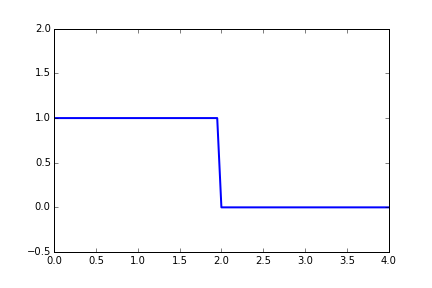
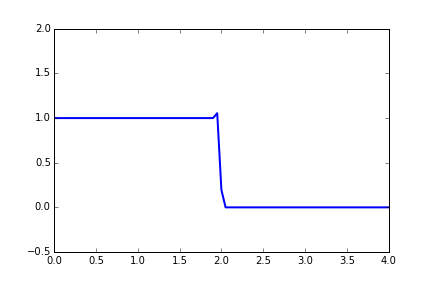
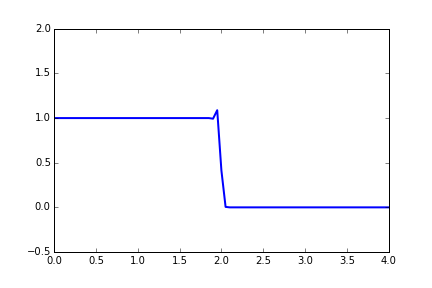
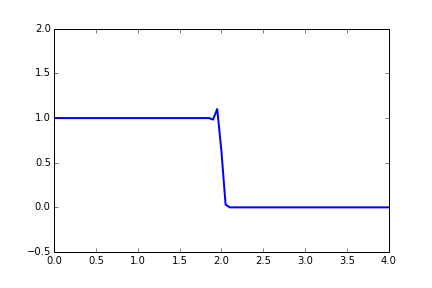
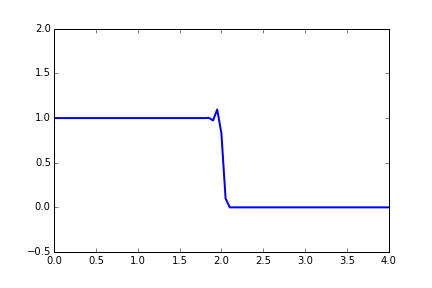
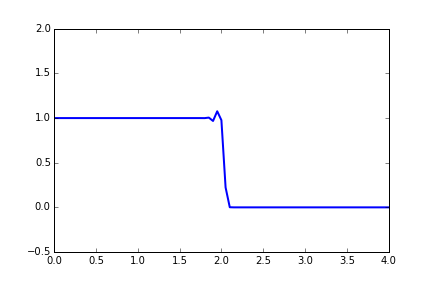
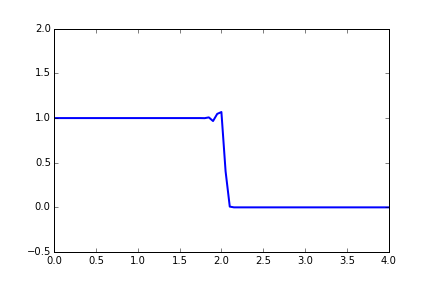
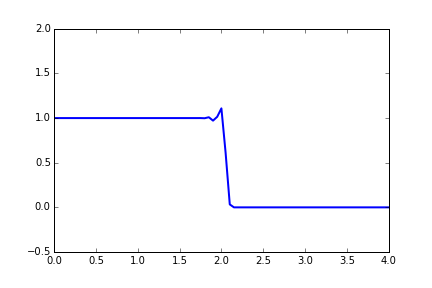
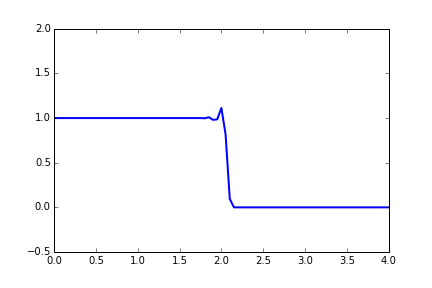
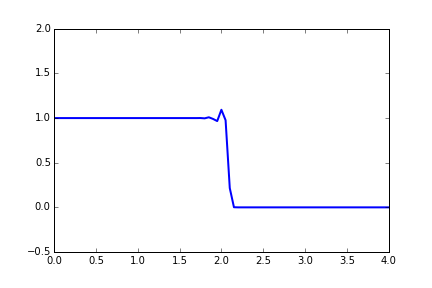
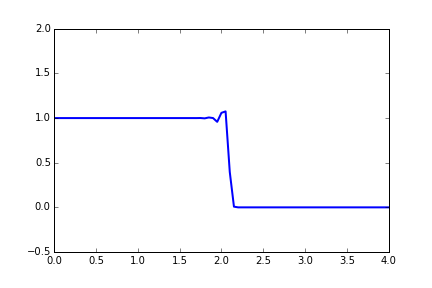
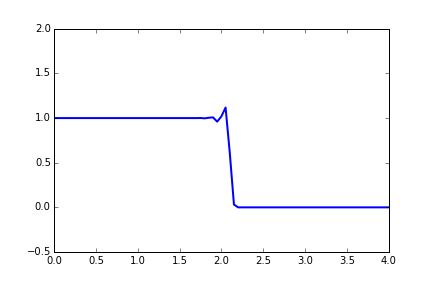
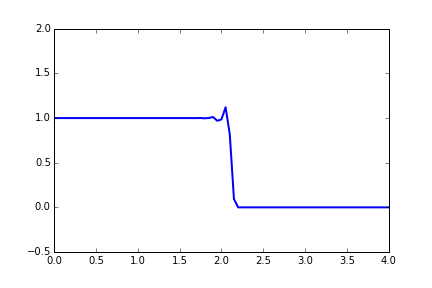
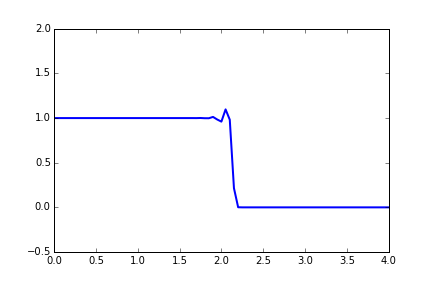
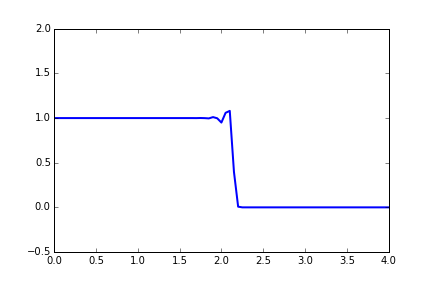
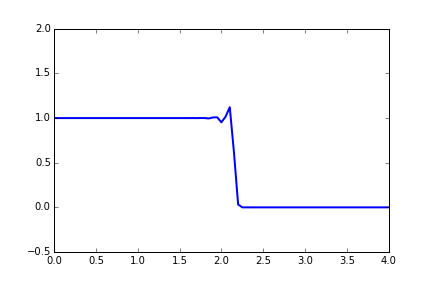
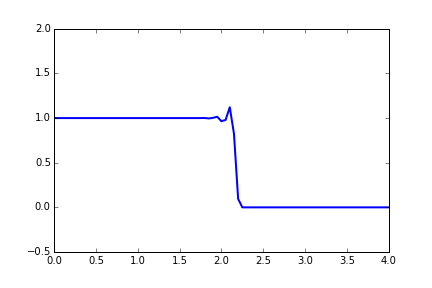
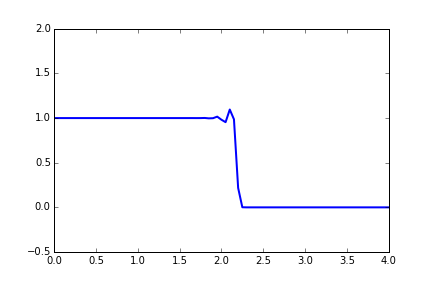
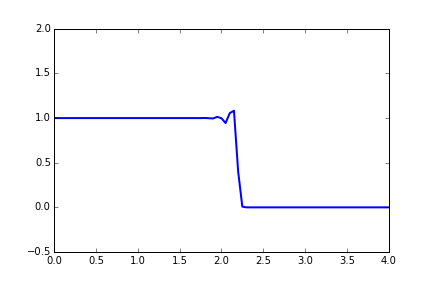
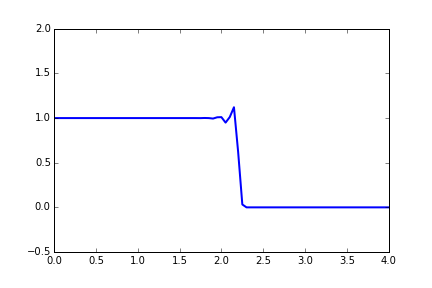
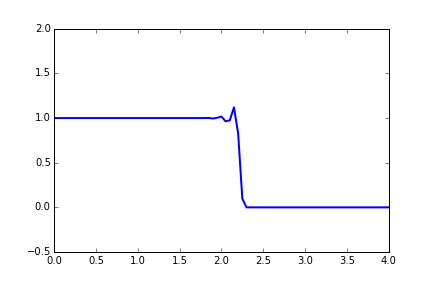
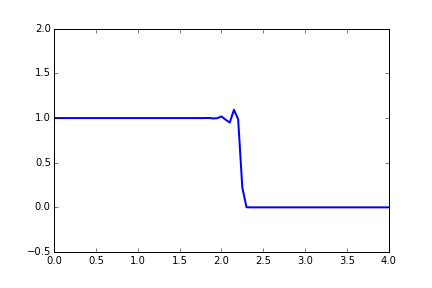
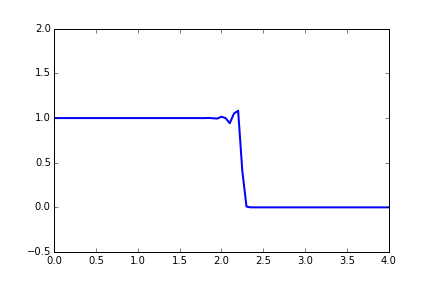
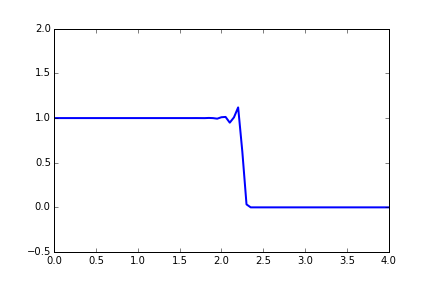
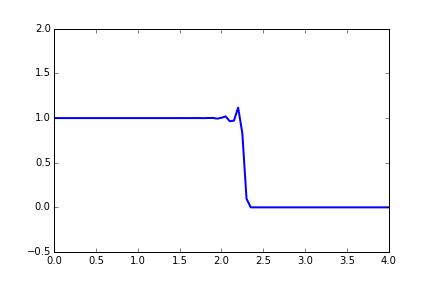
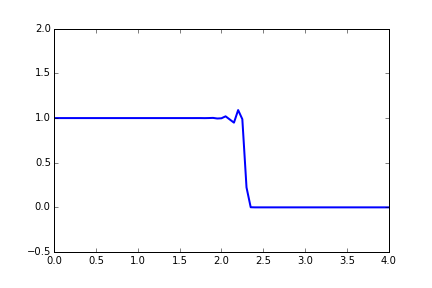
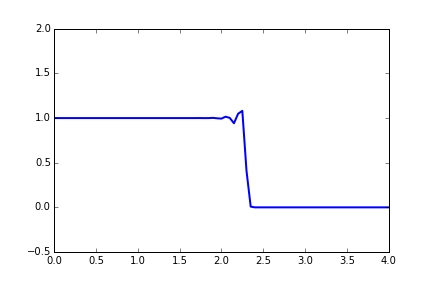
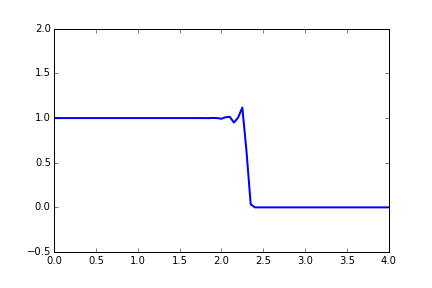
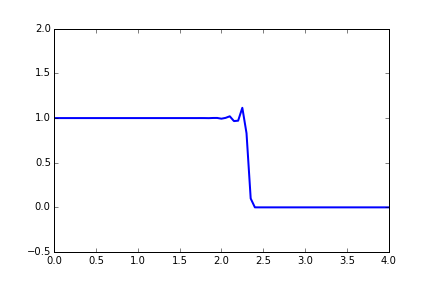
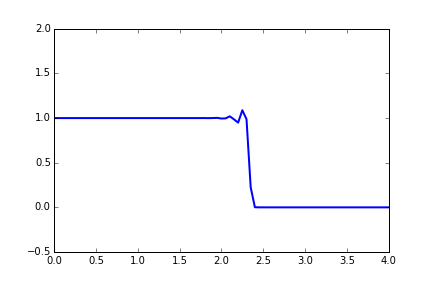
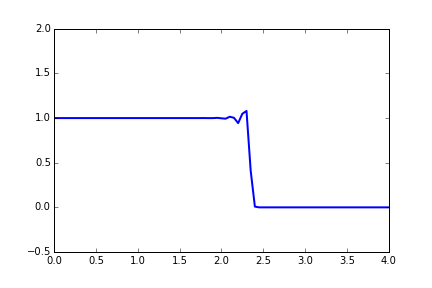
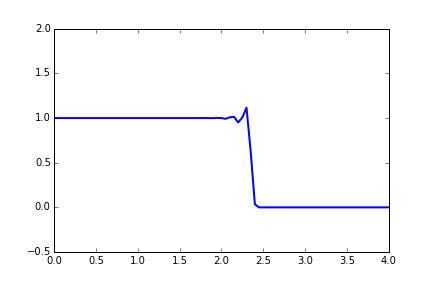
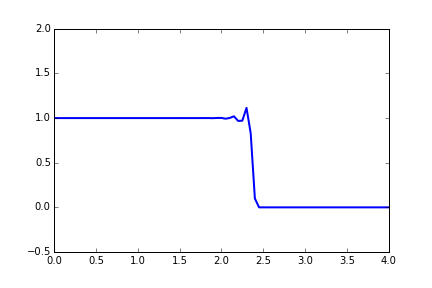
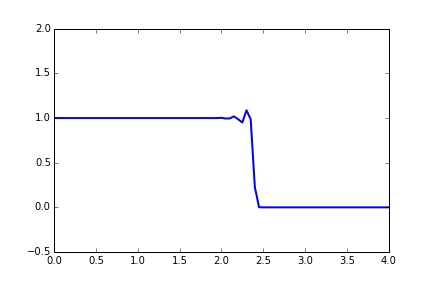
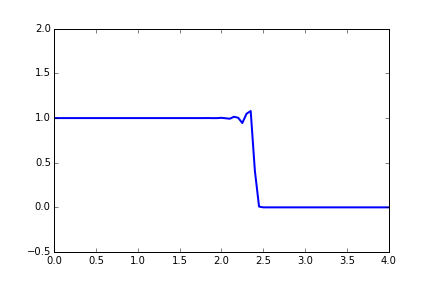
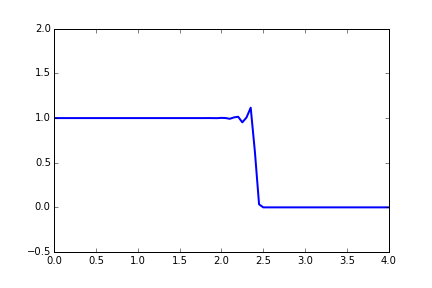
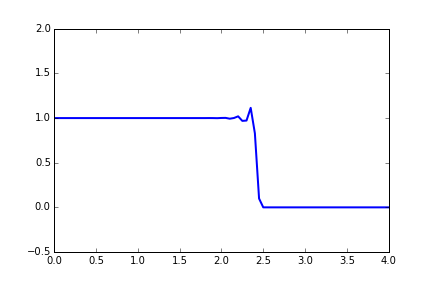
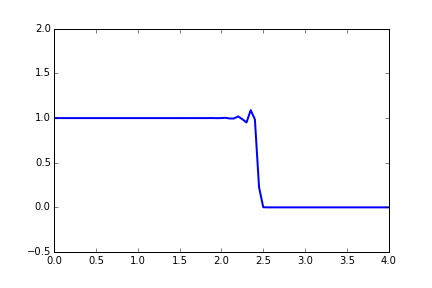
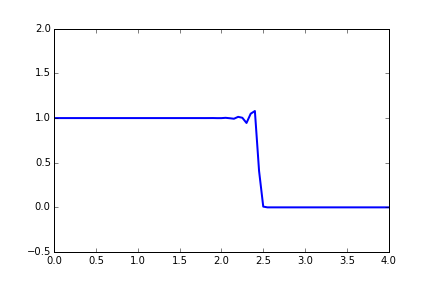
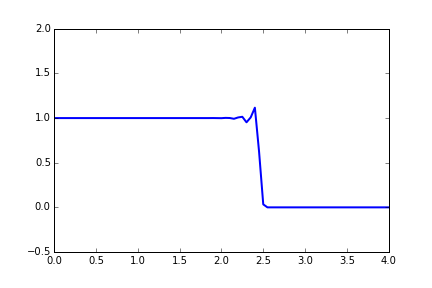
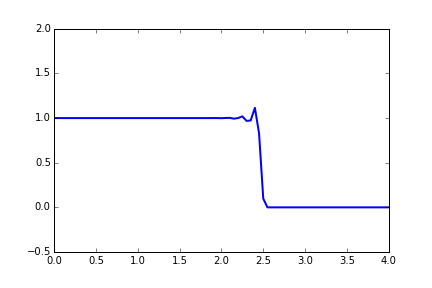
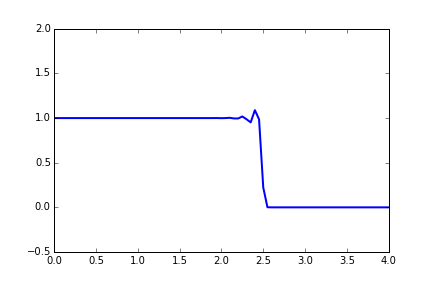
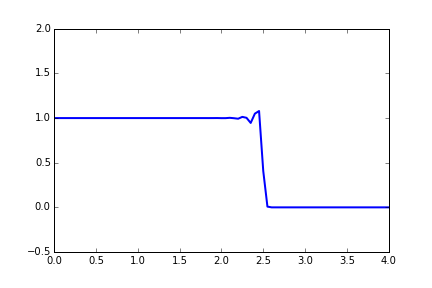
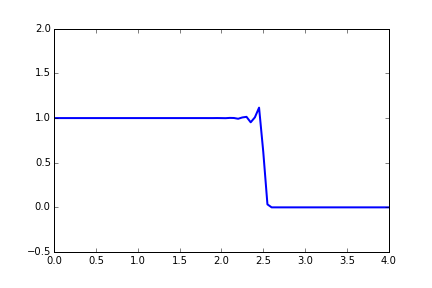
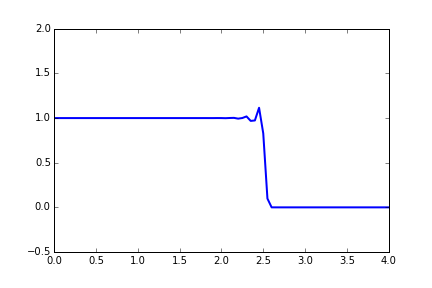
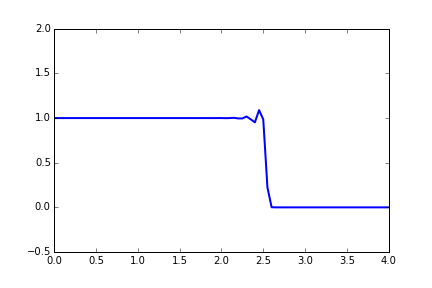
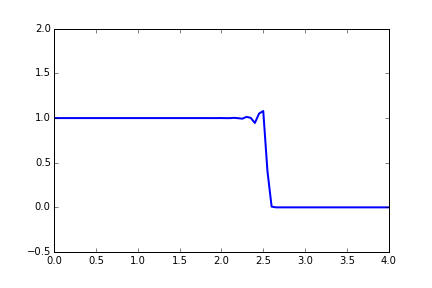
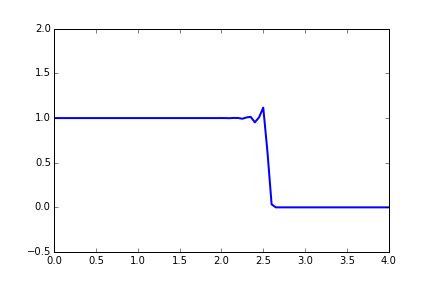
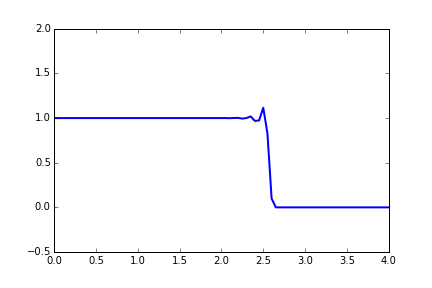
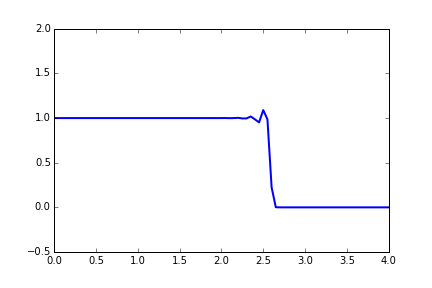
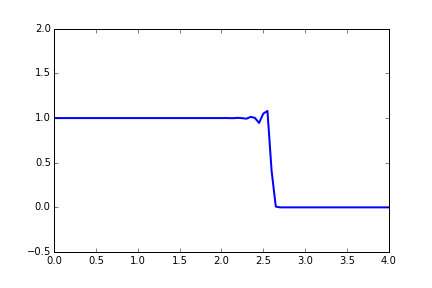
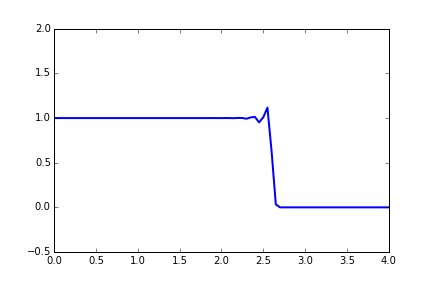
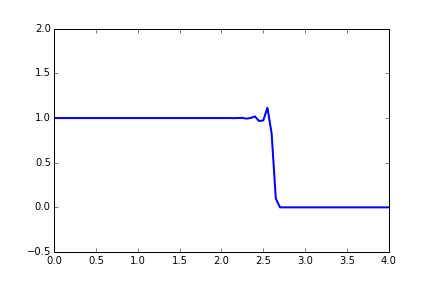
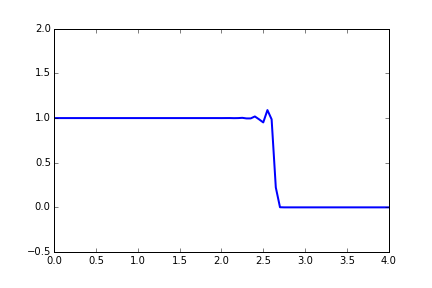
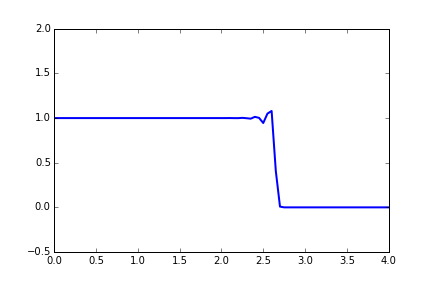
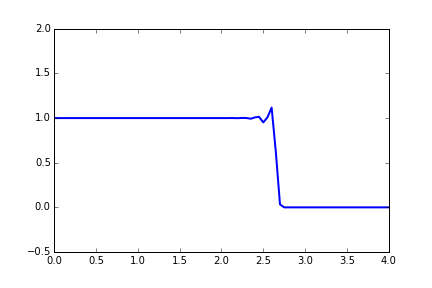
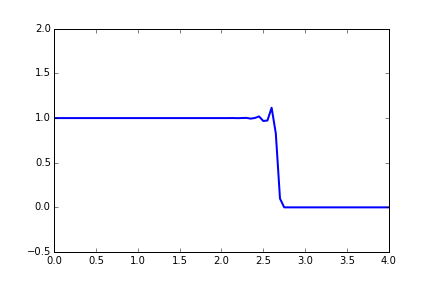
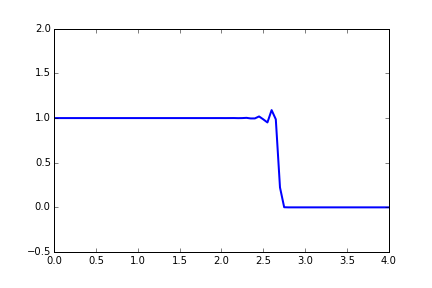
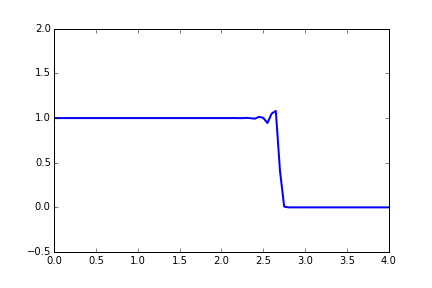
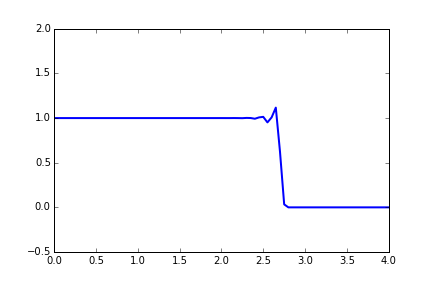
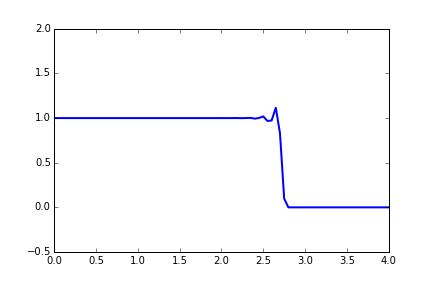
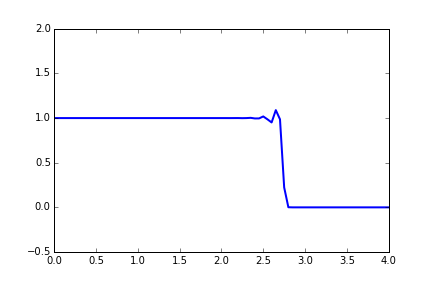
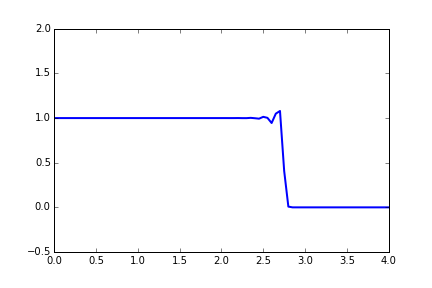
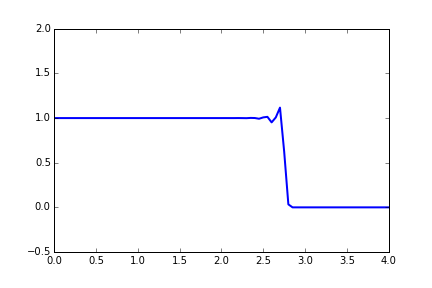
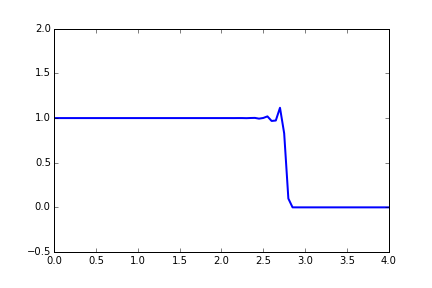
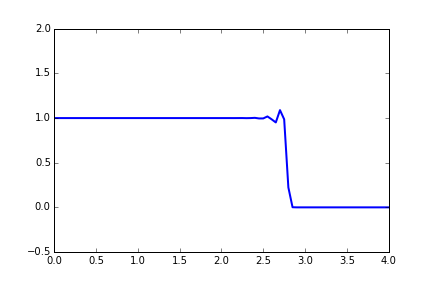
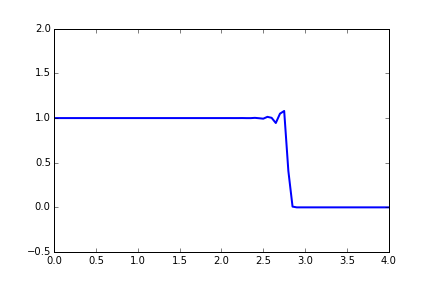
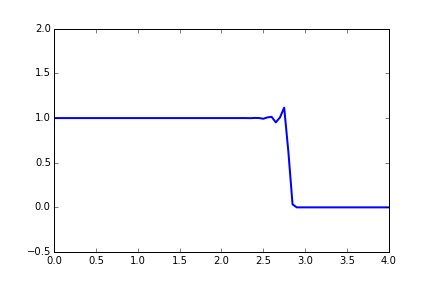
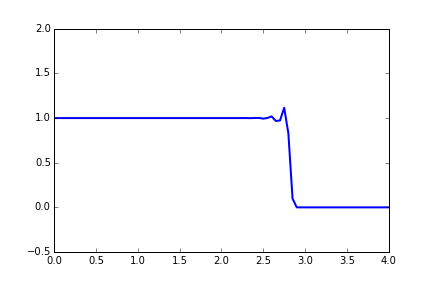
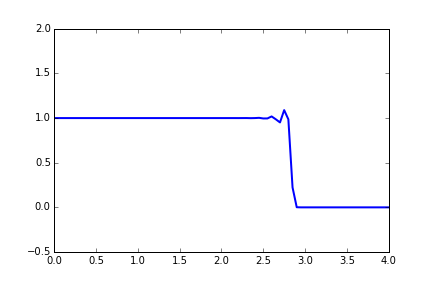

In [8]:
u = u_initial()
sigma = 1
dt = sigma*dx

un = maccormack(u,nt,dt,dx)

fig = plt.figure();
ax = plt.axes(xlim=(0,4),ylim=(-.5,2));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=un, interval=50)
display_animation(anim, default_mode='once')

In [9]:
def damping(u,nt,dt,dx):
    un=numpy.zeros((nt,len(u)))
    ustar=numpy.empty_like(u)
    un[:,:]=u.copy()
    ustar=u.copy()
    for i in range(1,nt):
        F=computeF(u)
        ustar[1:-1]=u[1:-1]-dt/dx*(F[2:]-F[1:-1])+epsl*(u[2:]-2*u[1:-1]+u[:-2])
        Fstar=computeF(ustar)
        un[i,1:]=.5*(u[1:]+ustar[1:]-dt/dx*(Fstar[1:]-Fstar[:-1]))
        u=un[i].copy()
    return un

C:\Users\yujia\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()



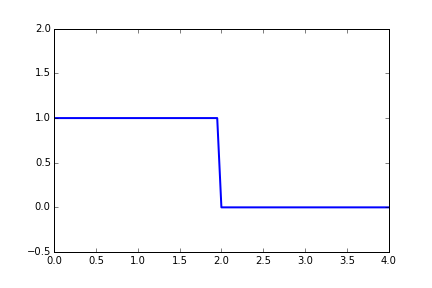
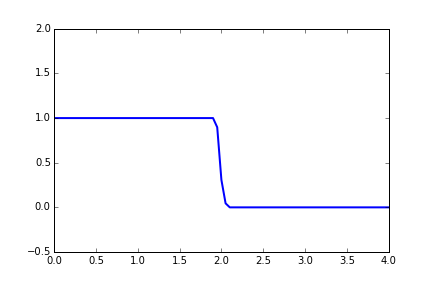
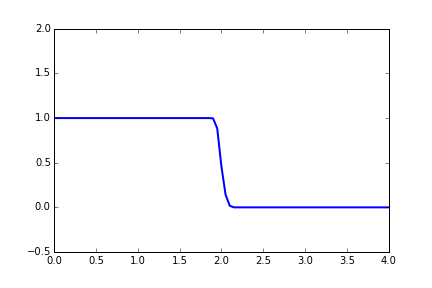
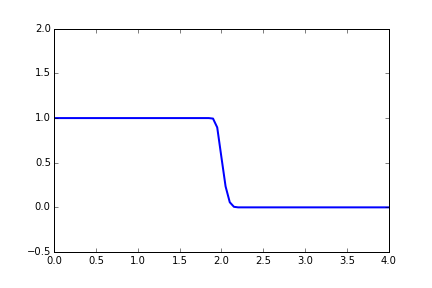
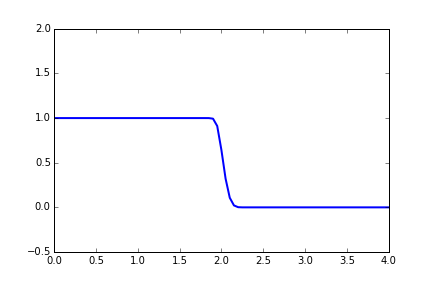
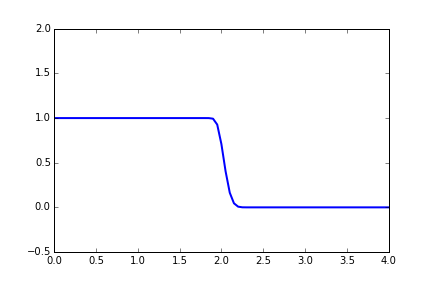
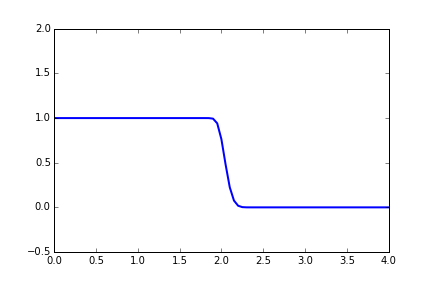
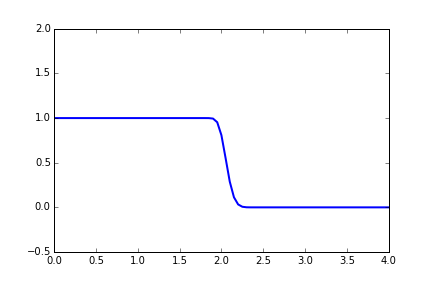
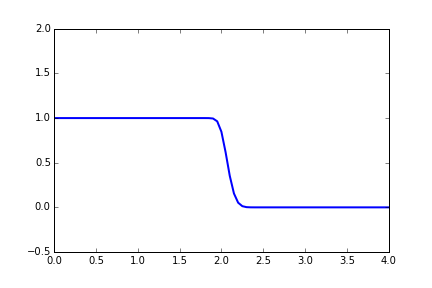
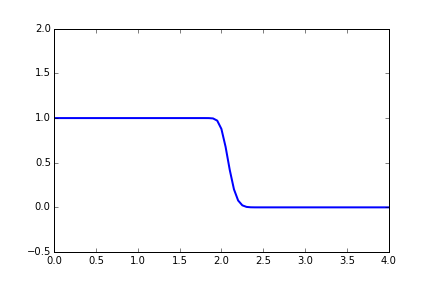
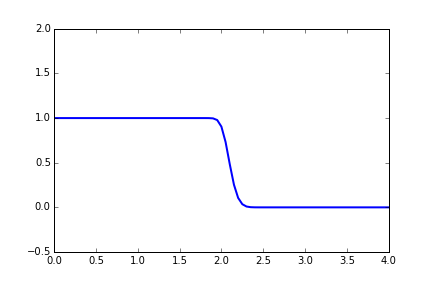
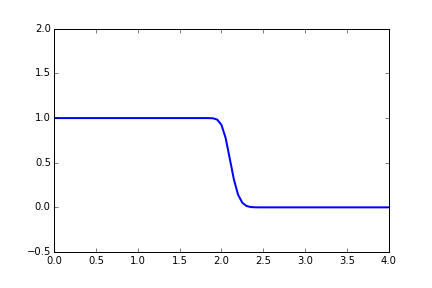
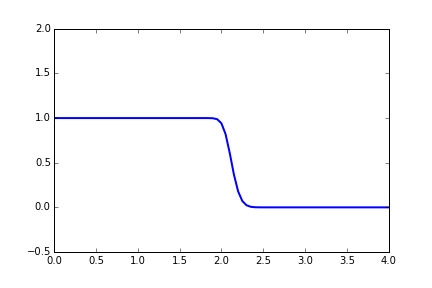
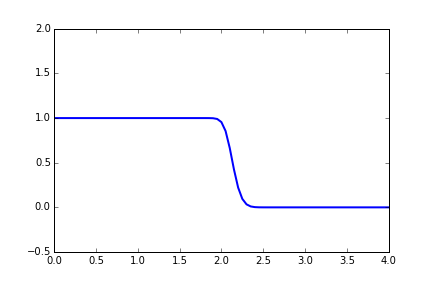
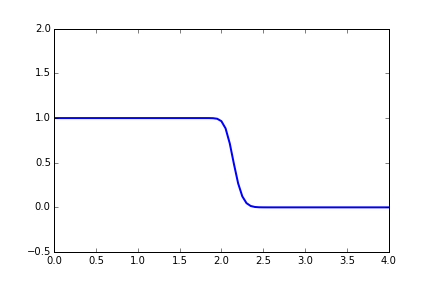
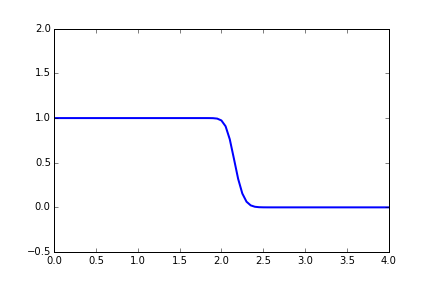
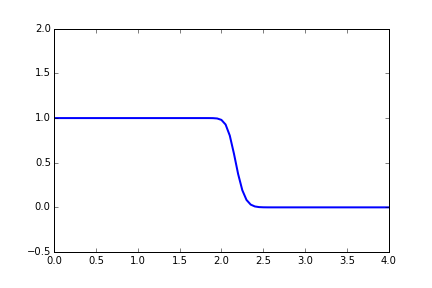
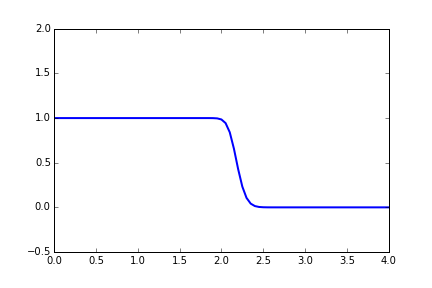
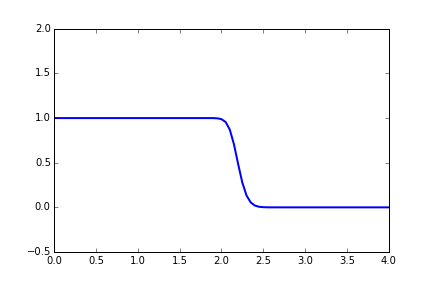
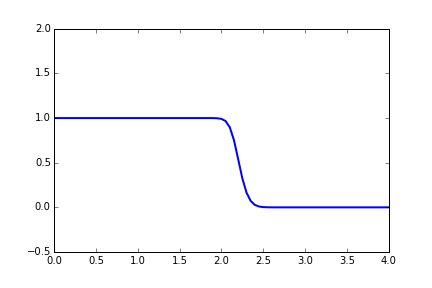
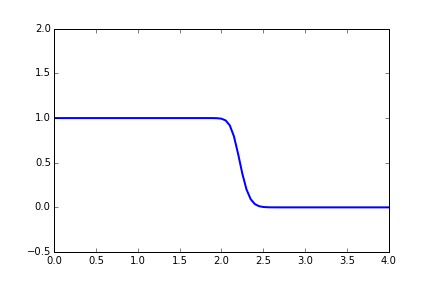
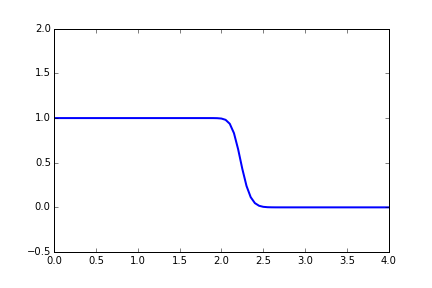
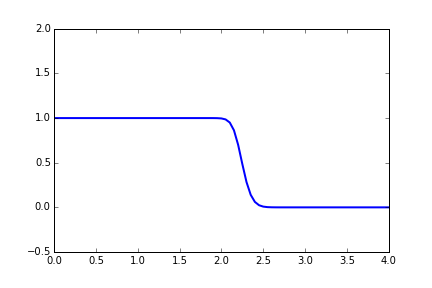
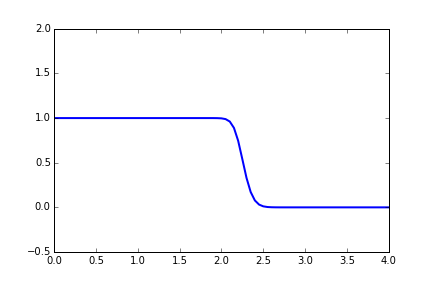
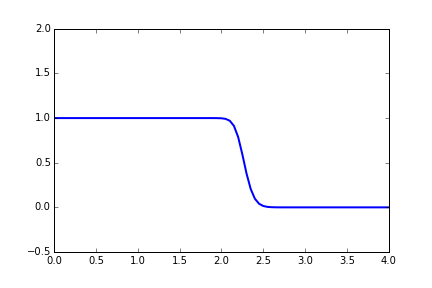
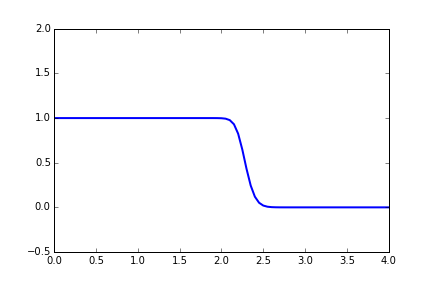
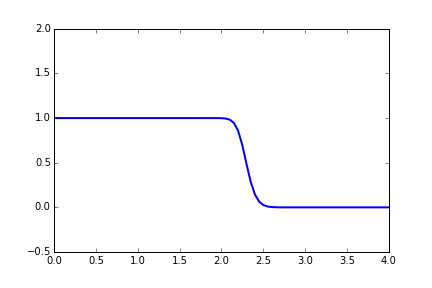
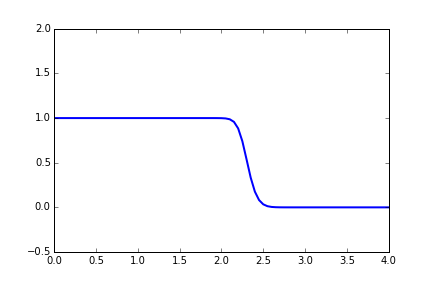
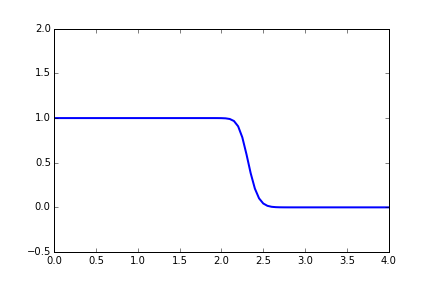
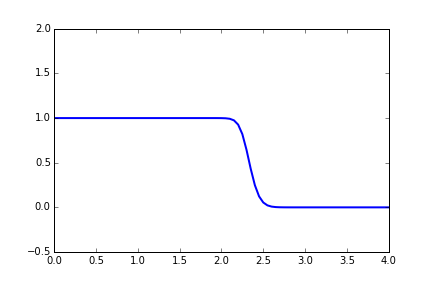
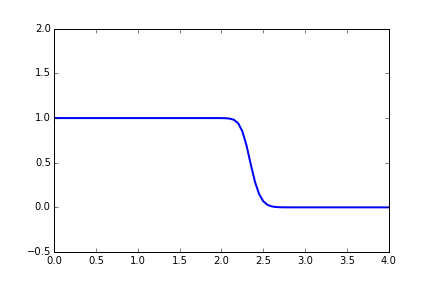
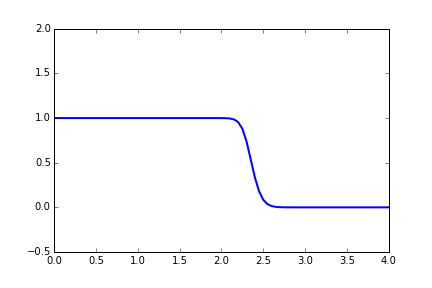
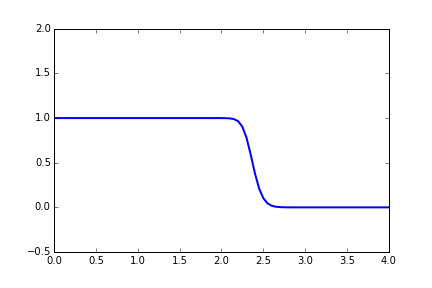
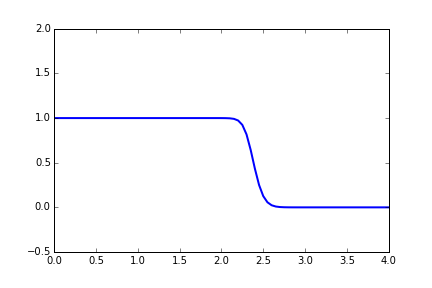
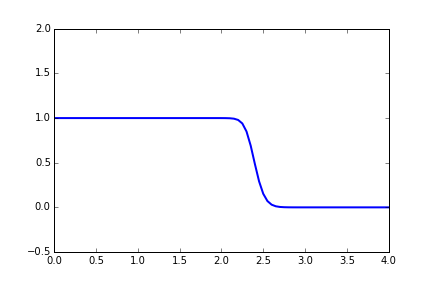
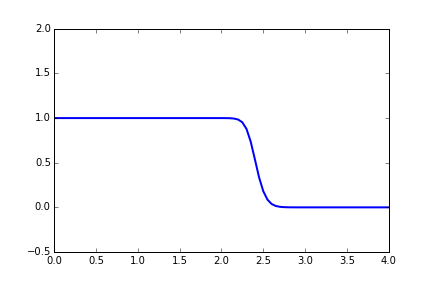
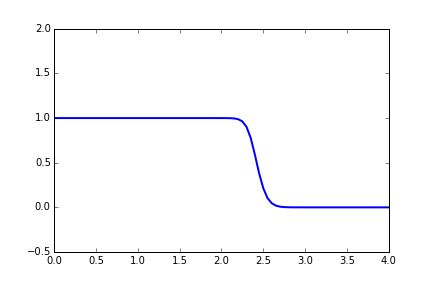
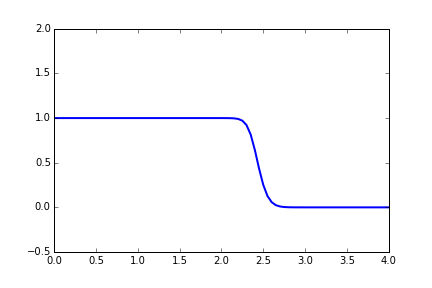
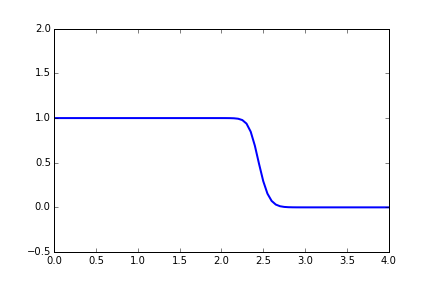
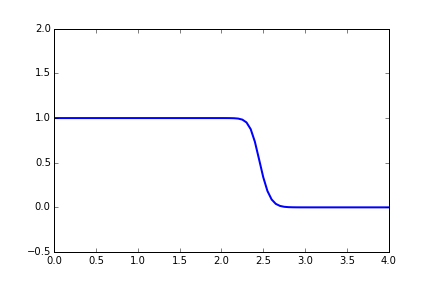
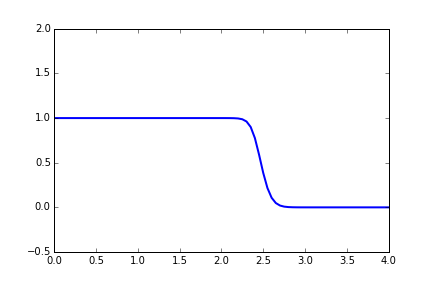
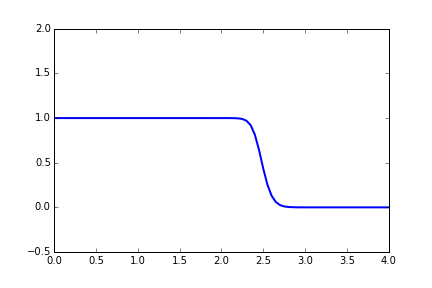
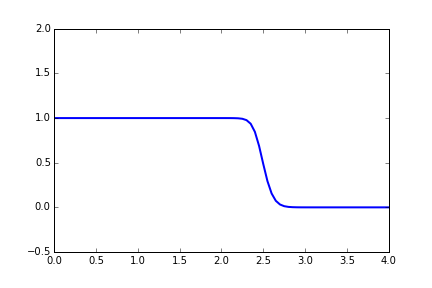
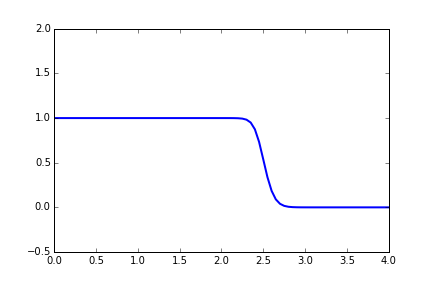
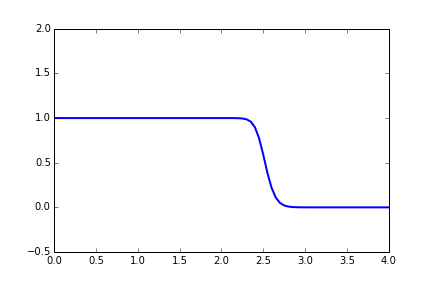
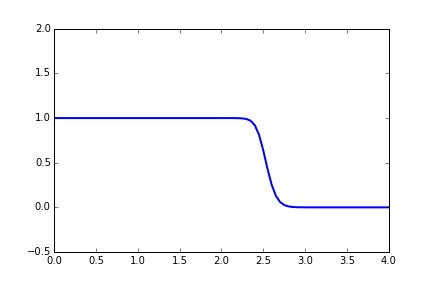
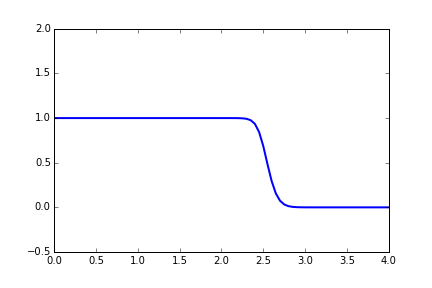
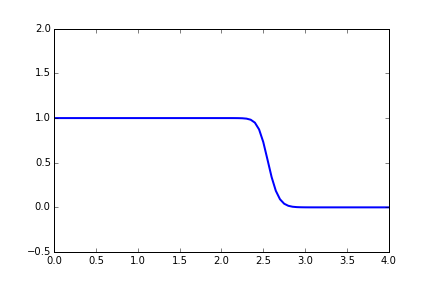
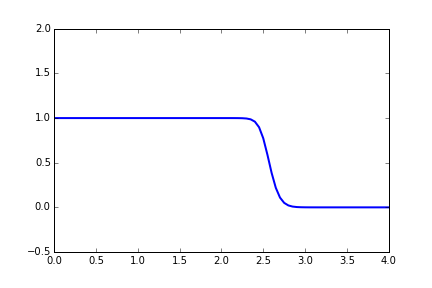
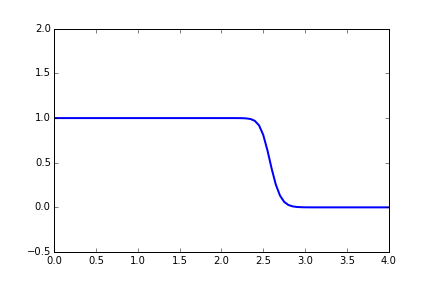
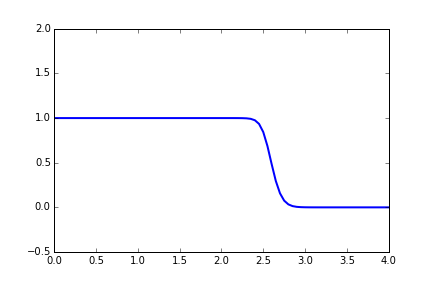
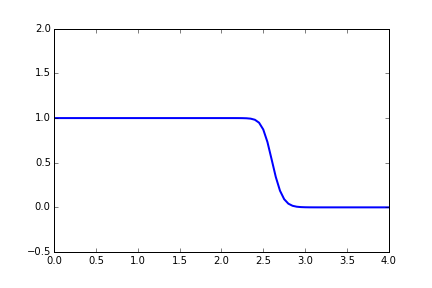
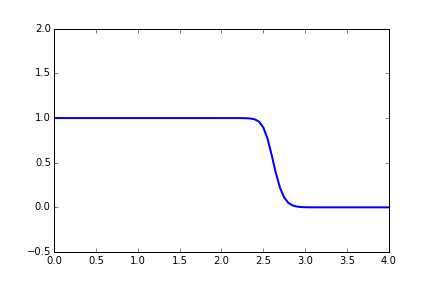
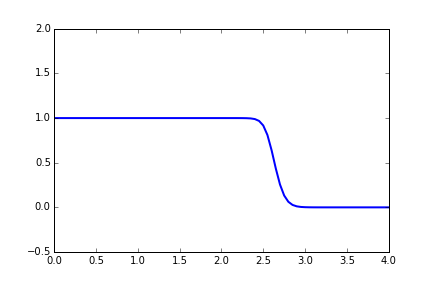
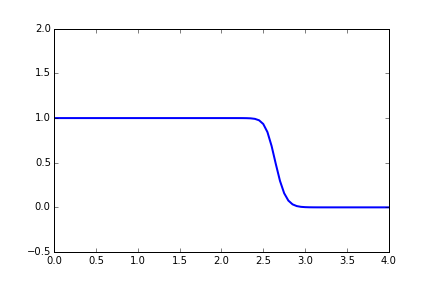
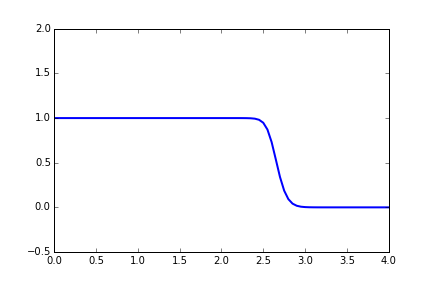
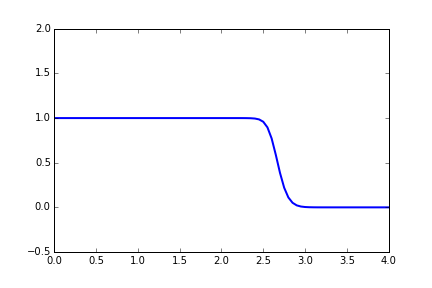
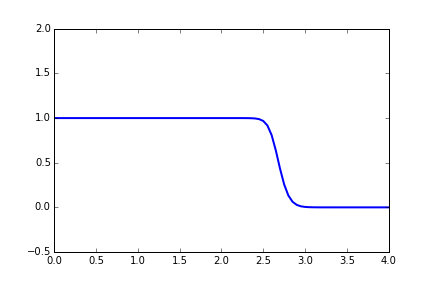
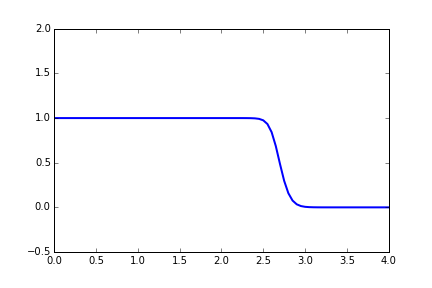
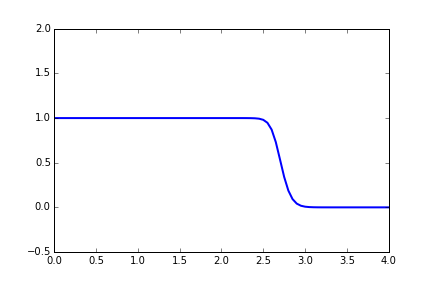
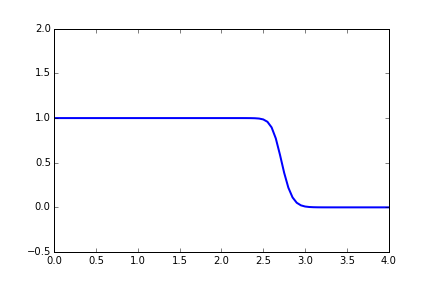
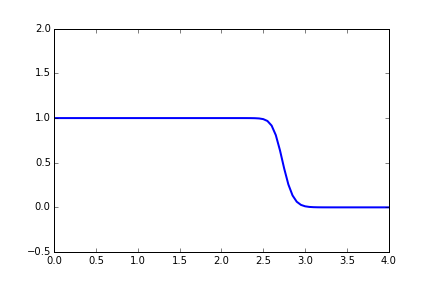
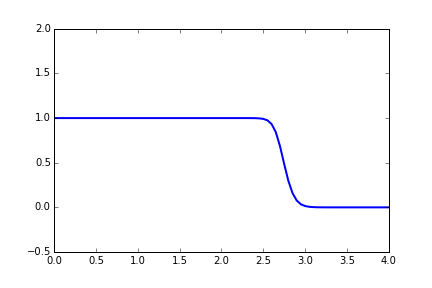
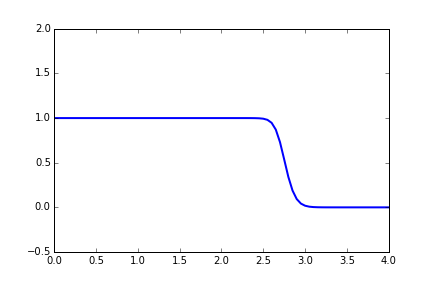
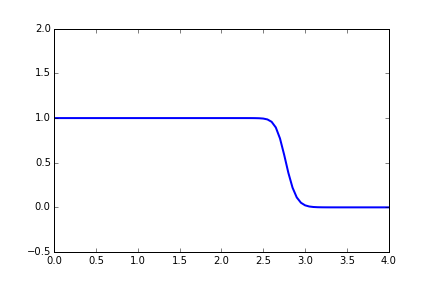
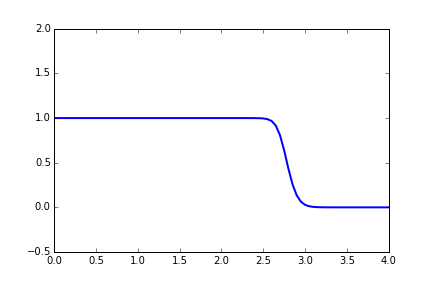
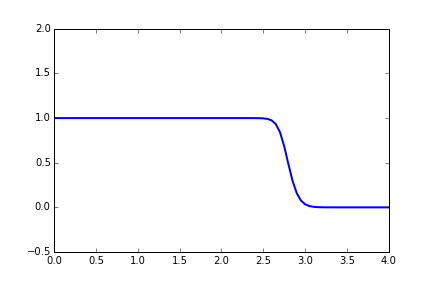
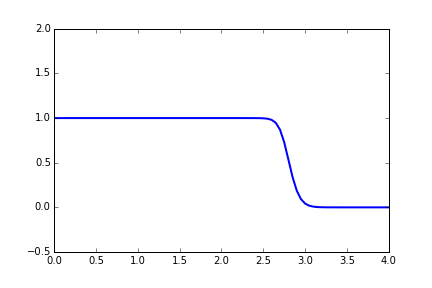
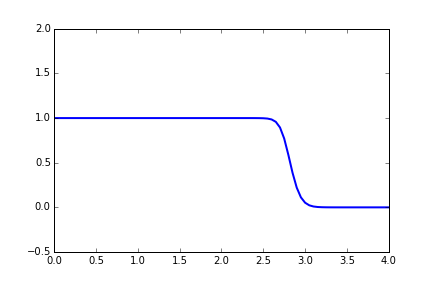
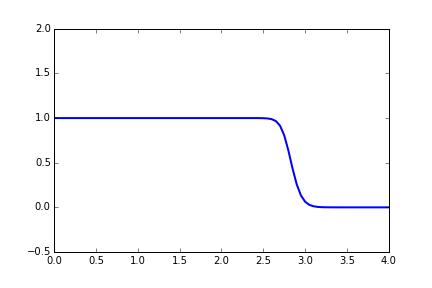

In [11]:
u = u_initial()
sigma = 1
dt = sigma*dx
epsl=0.6
un = damping(u,nt,dt,dx)

fig = plt.figure();
ax = plt.axes(xlim=(0,4),ylim=(-.5,2));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=un, interval=50)
display_animation(anim, default_mode='loop')